## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?



In [8]:
print(df["isBestSeller"].unique())


['No' 'Yes']



Top Categories by Best-Seller Proportion:
isBestSeller                    best_seller_proportion
category                                              
Grocery                                       0.058135
Smart Home Security & Lighting                0.057692
Health & Personal Care                        0.057686
Mobile Phone Accessories                      0.042471
Power & Hand Tools                            0.035339


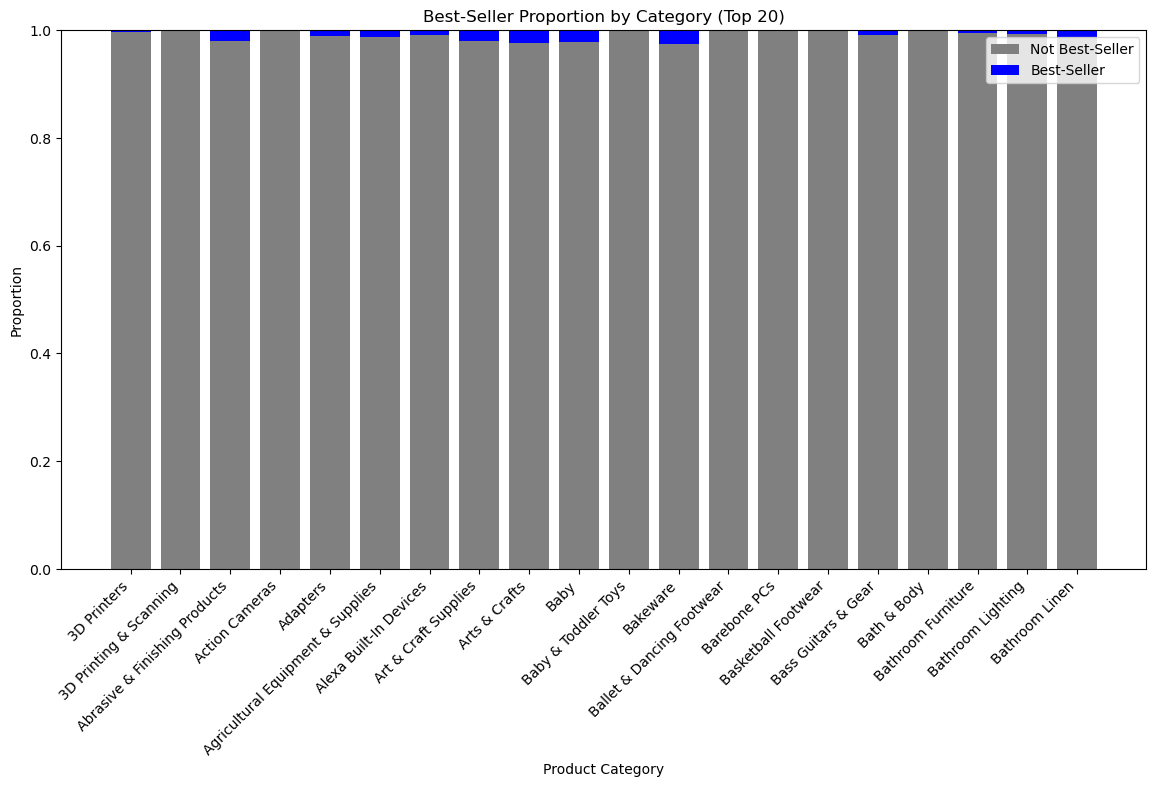

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr
import scipy.stats as stats
import statsmodels.api as sm

# Load dataset
df = pd.read_csv("amazon_dataset.csv")

# Crosstab Analysis with Sorting (Fixed for "Yes" and "No")
df_bestsellers = pd.crosstab(df["category"], df["isBestSeller"])
df_bestsellers["best_seller_proportion"] = df_bestsellers["Yes"] / (df_bestsellers["No"] + df_bestsellers["Yes"])
df_bestsellers_sorted = df_bestsellers.sort_values(by="best_seller_proportion", ascending=False)

print("\nTop Categories by Best-Seller Proportion:")
print(df_bestsellers_sorted[["best_seller_proportion"]].head())

# Improved Stacked Bar Chart with Proportions
df_bestsellers_reset = df_bestsellers.reset_index().head(20)  # Top 20 categories

plt.figure(figsize=(14, 7))
plt.bar(df_bestsellers_reset["category"], df_bestsellers_reset["No"] / (df_bestsellers_reset["No"] + df_bestsellers_reset["Yes"]), label="Not Best-Seller", color="gray")
plt.bar(df_bestsellers_reset["category"], df_bestsellers_reset["Yes"] / (df_bestsellers_reset["No"] + df_bestsellers_reset["Yes"]), 
        bottom=df_bestsellers_reset["No"] / (df_bestsellers_reset["No"] + df_bestsellers_reset["Yes"]), label="Best-Seller", color="blue")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Product Category")
plt.ylabel("Proportion")
plt.title("Best-Seller Proportion by Category (Top 20)")
plt.legend()
plt.show()



Chi2: 36540.20270061387, p-value: 0.0, DOF: 295
Cramér's V: 0.1222829439760564

Data after removing outliers: (2115963, 9)


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_65938/565267011.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="category", y="price", data=df_clean[df_clean["category"].isin(top_categories)], palette="coolwarm")


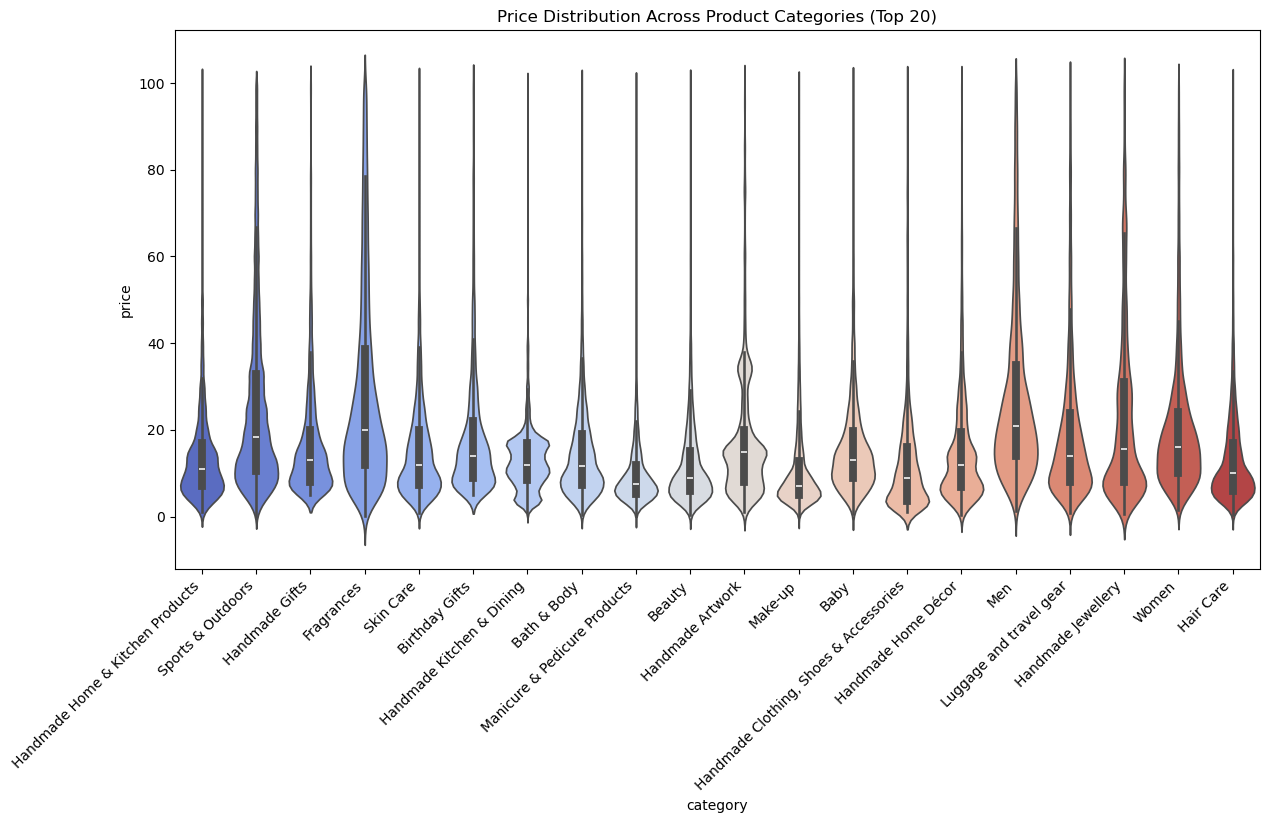

In [10]:


# Chi-Square Test & Cramér's V
observed_values = df_bestsellers.iloc[:, :-1].values  
chi2, p, dof, expected_values = chi2_contingency(observed_values)
n = np.sum(observed_values)  
k = min(observed_values.shape)  
cramers_v_value = np.sqrt(chi2 / (n * (k - 1)))

print(f"\nChi2: {chi2}, p-value: {p}, DOF: {dof}")
print(f"Cramér's V: {cramers_v_value}")


# Outlier Removal using Tukey's IQR
def tukeys_test_outliers(data):    
    Q1 = data["price"].quantile(0.25)
    Q3 = data["price"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data["price"] < lower_bound) | (data["price"] > upper_bound)]

df_clean = df[~df.index.isin(tukeys_test_outliers(df).index)]
print(f"\nData after removing outliers: {df_clean.shape}")

# Violin Plot: Price Distribution Across Product Categories
top_categories = df_clean["category"].value_counts().index[:20]
plt.figure(figsize=(14, 7))
sns.violinplot(x="category", y="price", data=df_clean[df_clean["category"].isin(top_categories)], palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Price Distribution Across Product Categories (Top 20)")
plt.show()


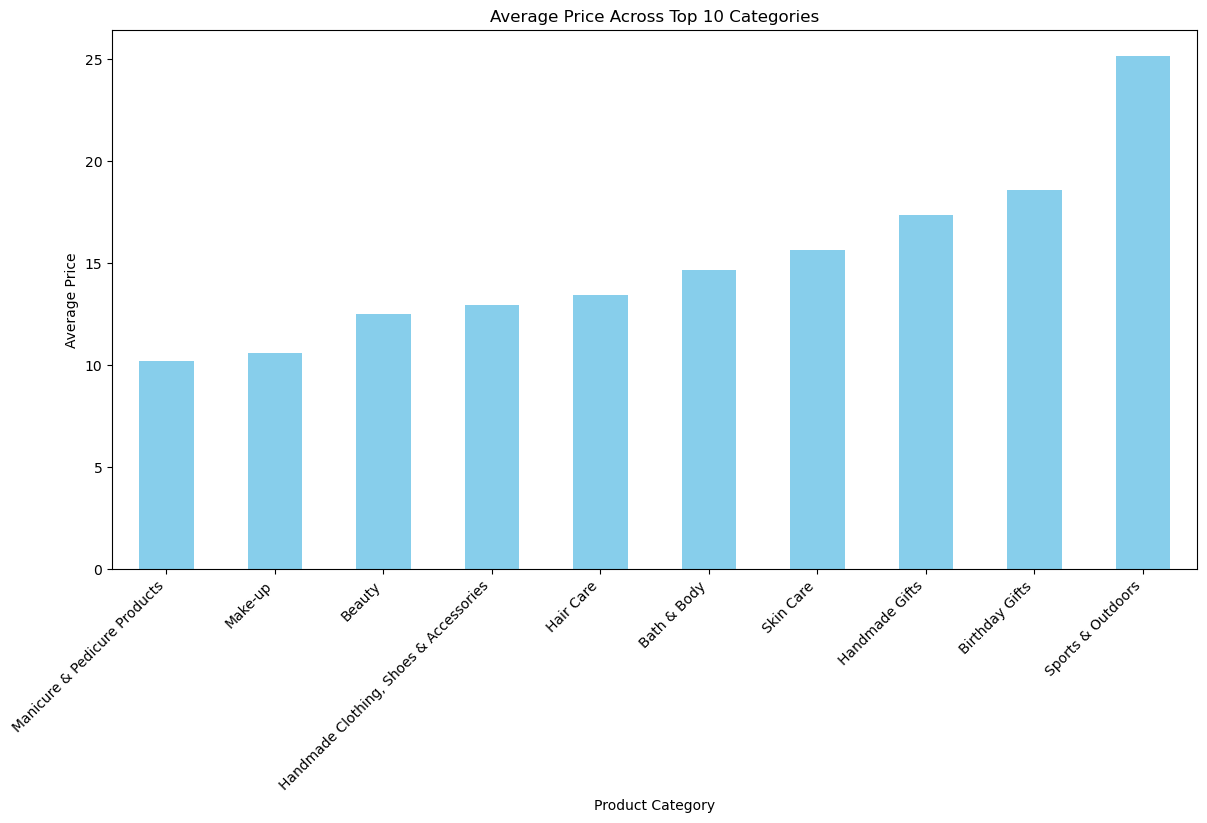

/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_65938/4183821583.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="category", y="stars", data=df_clean[df_clean["category"].isin(top_10_categories)], palette="coolwarm")


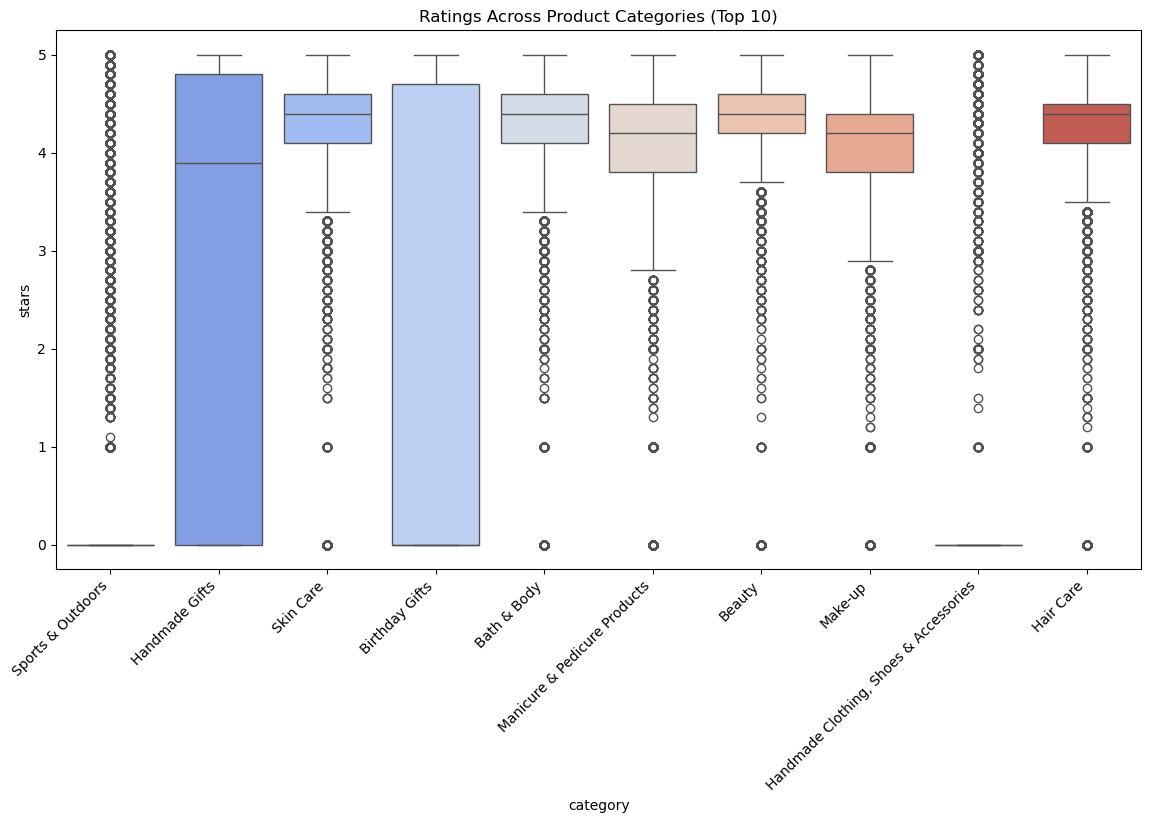


Spearman Correlation between Price and Ratings: -0.07


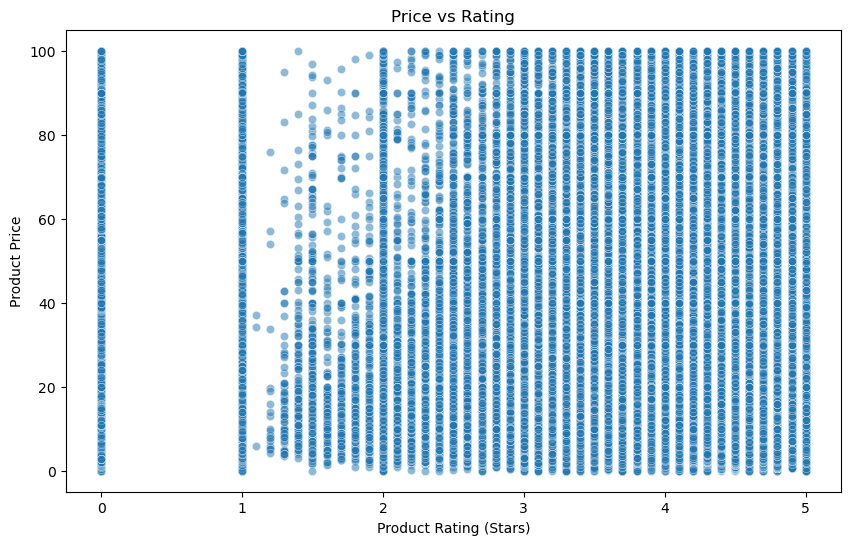

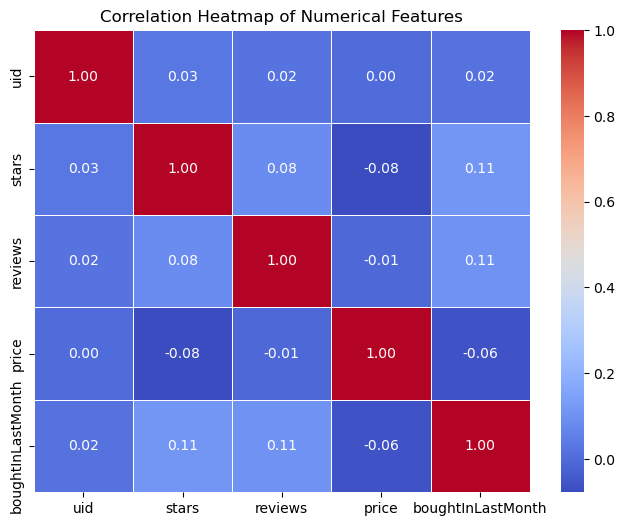

<Figure size 800x600 with 0 Axes>

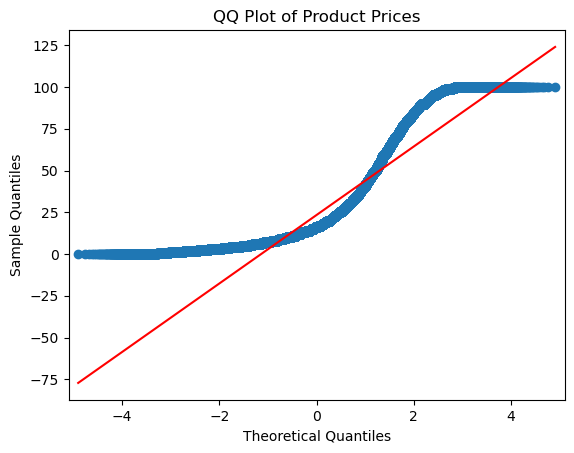

In [12]:

# Bar Chart: Average Price by Product Category
top_10_categories = df_clean["category"].value_counts().index[:10]
avg_price = df_clean[df_clean["category"].isin(top_10_categories)].groupby("category")["price"].mean().sort_values()

plt.figure(figsize=(14, 7))
avg_price.plot(kind="bar", color="skyblue")
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.title("Average Price Across Top 10 Categories")
plt.xticks(rotation=45, ha="right")
plt.show()

# Box Plot: Rating Distribution by Category
plt.figure(figsize=(14, 7))
sns.boxplot(x="category", y="stars", data=df_clean[df_clean["category"].isin(top_10_categories)], palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Ratings Across Product Categories (Top 10)")
plt.show()


# Correlation Between Price & Ratings
corr_price_stars, _ = spearmanr(df_clean["price"], df_clean["stars"])
print(f"\nSpearman Correlation between Price and Ratings: {corr_price_stars:.2f}")

# Scatter Plot: Price vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x="stars", y="price", data=df_clean, alpha=0.5)
plt.xlabel("Product Rating (Stars)")
plt.ylabel("Product Price")
plt.title("Price vs Rating")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# QQ Plot: Checking Normality of Product Prices
plt.figure(figsize=(8, 6))
sm.qqplot(df_clean["price"], line="s")
plt.title("QQ Plot of Product Prices")
plt.show()
